# Importing Dataset

In [9]:
import pandas as pd

df = pd.read_csv("water_potability.csv")

print(df.shape)
df.head()

(3276, 10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Visual Representation of data

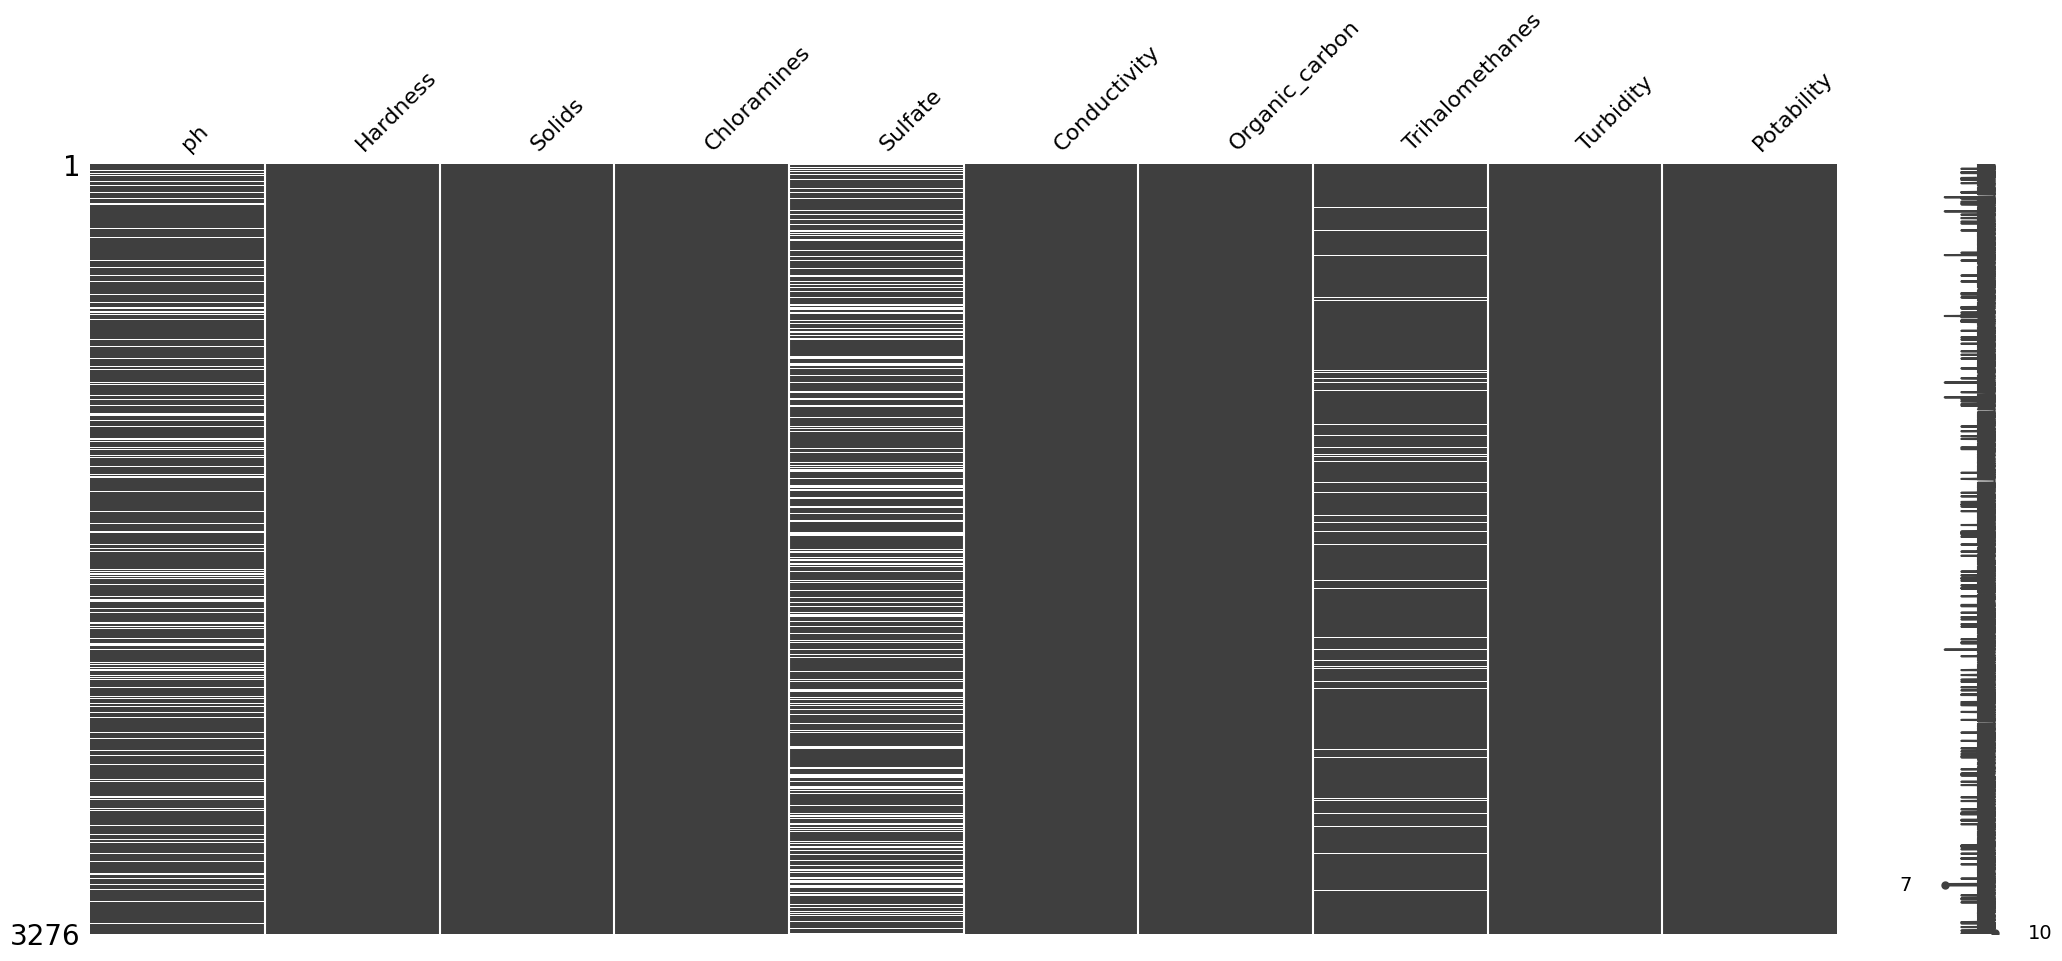

In [10]:
import matplotlib.pyplot as plt
import missingno as msno

msno.matrix(df)
plt.show()

# Check the data for coorelation between features to make sure no confounding variables exist

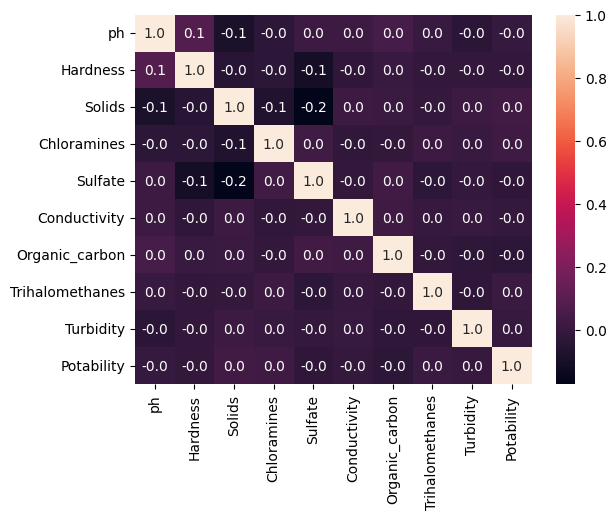

In [11]:
import seaborn as sns

dfHeatMap = sns.heatmap(df.corr(), annot=True, fmt=".1f")

# Processing Missing Data, and choosing feature collumns

In [12]:
usingCollumns = ['ph','Sulfate','Hardness','Potability']

df = df[usingCollumns]

# df = df[df['ph'].notna()][usingCollumns]
# df = df.dropna()

#Nan to Mean
df['ph']=df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
df['Sulfate']=df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
# df['Trihalomethanes']=df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))


In [13]:
import numpy as np


y = df['Potability']

inputsMask = np.where(df.columns.values != "Potability", True, False)
collumNames = df.columns.values[inputsMask]
X = df[collumNames]

X = normalized_df=(X-X.min())/(X.max()-X.min())

# df.head()
X.head()
# y.head()

,ph,Sulfate,Hardness
0,0.506098,0.680385,0.571139
1,0.265434,0.583939,0.297400
2,0.578509,0.583939,0.641311
3,0.594055,0.647347,0.605536
4,0.649445,0.514545,0.484851


# Double Check to make sure we selected the correct collumns and remove NaN values

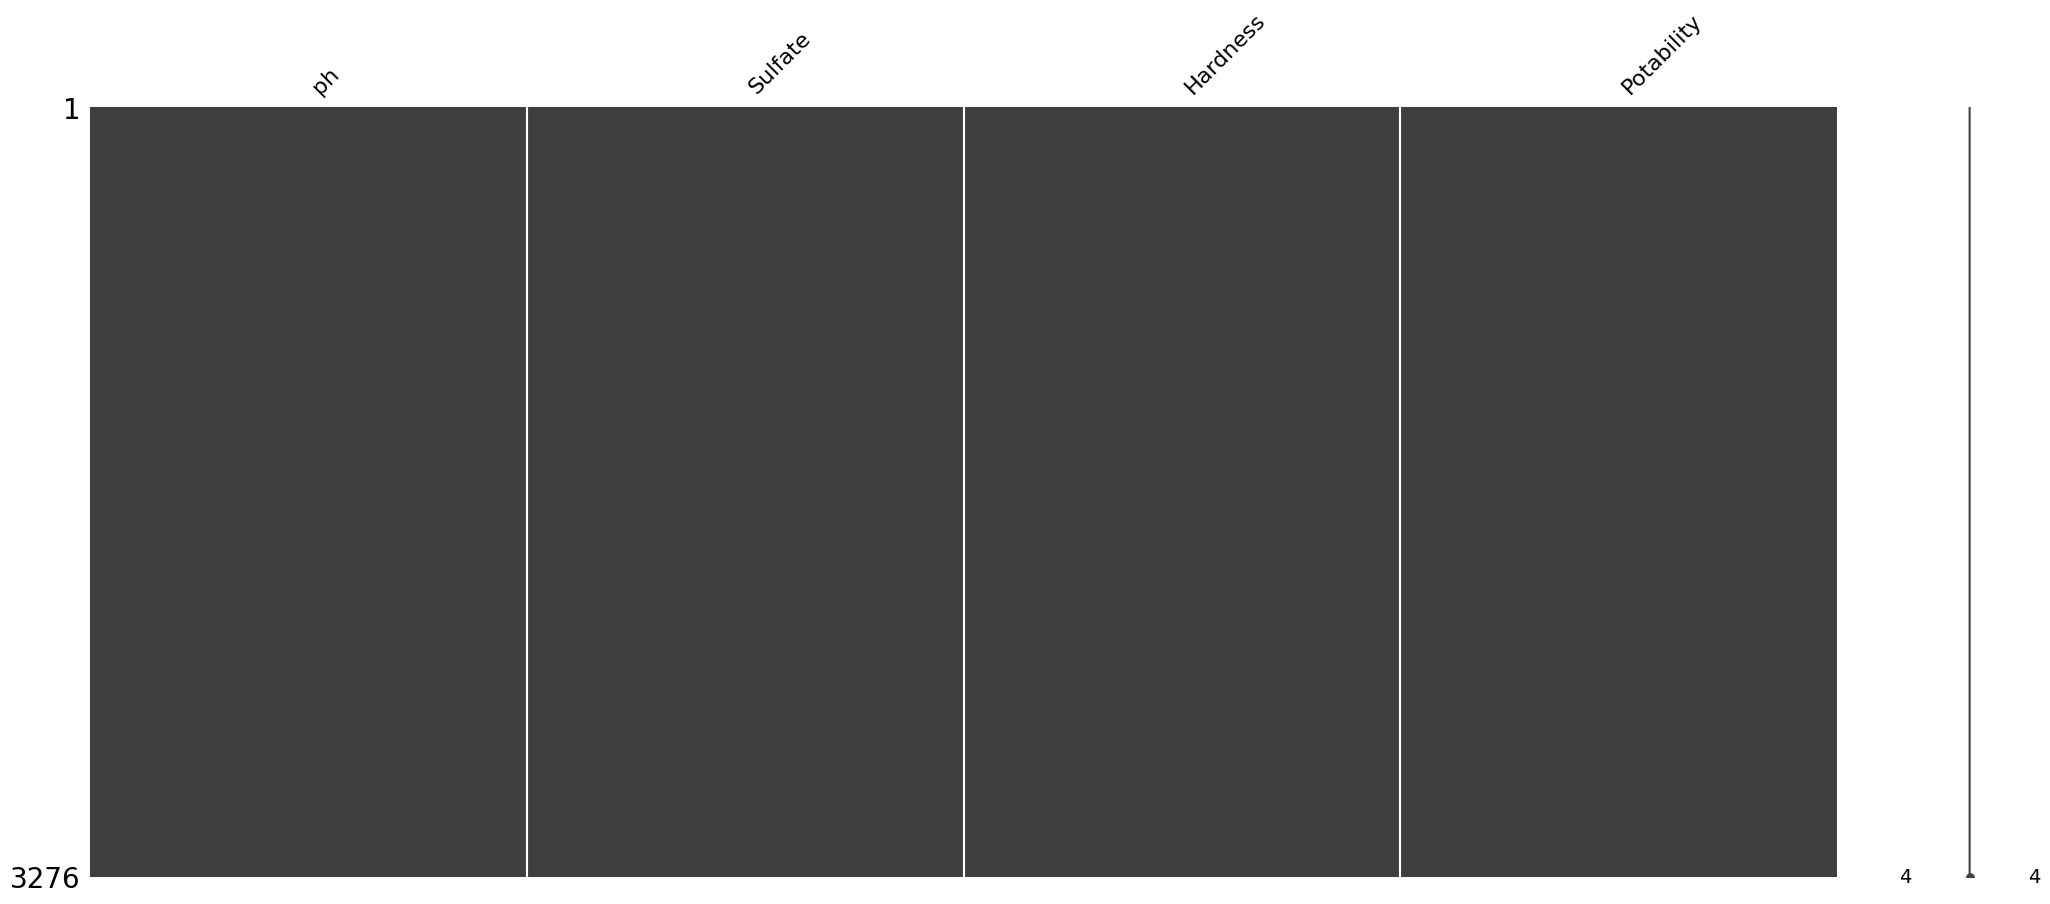

(3276, 4)

In [14]:
import matplotlib.pyplot as plt
import missingno as msno

msno.matrix(df)
plt.show()

df.shape

# Separate data into a 90-10 Train Test Split

In [15]:
from sklearn import model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.10, random_state = 1, shuffle = True)
# X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.20, random_state = 1, shuffle = True)

X_train.head()

,ph,Sulfate,Hardness
3131,0.489330,0.578265,0.672849
2059,0.502263,0.773424,0.557035
1068,0.238899,0.687860,0.395543
3227,0.548543,0.459450,0.553665
574,0.511238,0.610073,0.604218


# Start running different classifiers.
## First is Logistic Regression, and its accuracy.

In [27]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

logScore = clf.score(X_test, y_test)
print(logScore)

0.5701219512195121


## Next we will try K Nearest Neighbors on different neighbor values from 1 to 15

1, 0.6432926829268293


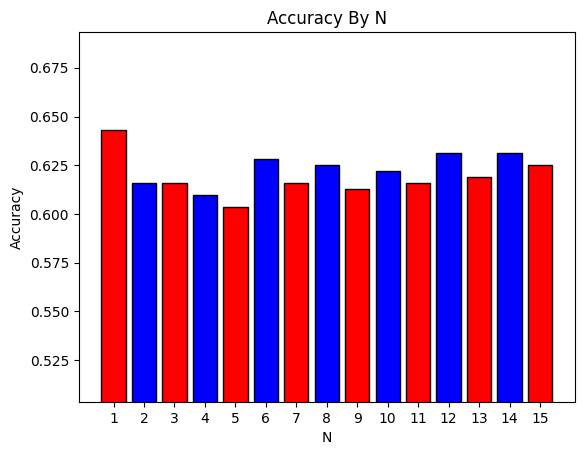

In [17]:
from sklearn.neighbors import KNeighborsClassifier

maxNeighbors = 15

neighborScores = []
nRange = range(1,maxNeighbors+1)
for i in nRange:

    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)

    knnScore = neigh.score(X_test, y_test)
    # print(knnScore)
    neighborScores.append(knnScore)


fig, ax = plt.subplots()

colors = ['r' if i % 2 == 1 else 'b' for i in nRange]
ax.bar(nRange, neighborScores, label=nRange, color = colors, edgecolor = 'k')

ax.set_ylabel('Accuracy')
ax.set_xlabel('N')
ax.set_title('Accuracy By N')
plt.ylim([max(min(neighborScores) - 0.1,0), min(max(neighborScores) + 0.05,1) ])

maxAcc = max(neighborScores)
print(f"{(neighborScores.index(maxAcc) + 1)}, {maxAcc}")

plt.xticks(nRange)

plt.show()



## Then we tried Random Forests with different values for the maximum depth of each Decission Tree
### And display the Confusion Matrix

10 0.7926829268292683


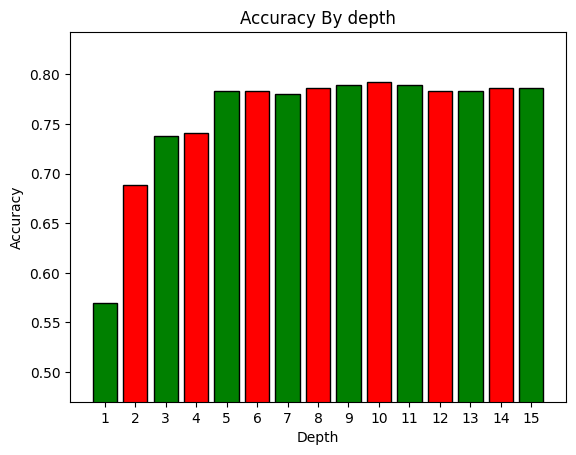

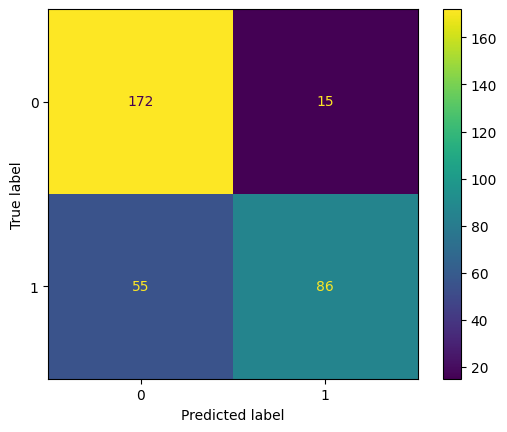

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

maxDepth = 15

depthScores = []
nRange = range(1,maxDepth+1)
for i in nRange:
    forest = RandomForestClassifier(max_depth=i, random_state=0)
    forest.fit(X_train, y_train)

    forestScore = forest.score(X_test, y_test)
    # print(forestScore)
    depthScores.append(forestScore)



fig, ax = plt.subplots()

colors = ['g' if i % 2 == 1 else 'r' for i in nRange]
ax.bar(nRange, depthScores, label=nRange, color = colors, edgecolor = 'k')

ax.set_ylabel('Accuracy')
ax.set_xlabel('Depth')
ax.set_title('Accuracy By depth')

plt.ylim([max(min(depthScores) - 0.1,0), min(max(depthScores) + 0.05,1) ])

maxAccForest = max(depthScores)
print(depthScores.index(maxAccForest)+1, maxAccForest)

plt.xticks(nRange)

plt.show()

pred = forest.predict(X_test)

a = metrics.ConfusionMatrixDisplay.from_estimator(forest, X_test, y_test)

## Then we tried Support Vector Machines with a linear kernel

In [19]:
from sklearn.svm import SVC

linear_svc = SVC(kernel='linear', random_state= 1)
linear_svc.fit(X_train,y_train)

rbfScore = linear_svc.score(X_test, y_test)
print(rbfScore)

0.5701219512195121


## And with a radial basis (rbf) kernel

In [20]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

rbf_svc = SVC(kernel='rbf', random_state= 1)
rbf_svc.fit(X_train,y_train)

rbfScore = rbf_svc.score(X_test, y_test)
print(rbfScore)

pred = rbf_svc.predict(X_test)
# print(classification_report(y_test, pred))

# disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred)


#TN,FP
#FN,TP

0.6341463414634146


## Trying Many different online classifiers and seeing their accuracy scores
### Random Forest comes out on top!

In [25]:
# from yellowbrick.classifier import ROCAUC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


mod = []
cv_score=[]
model =[rbf_svc,linear_svc,forest, neigh, AdaBoostClassifier(), BaggingClassifier(), DecisionTreeClassifier(), ExtraTreeClassifier(), KNeighborsClassifier()]
for m in model:
    cv_score.append(cross_val_score(m, X_train, y_train, scoring='accuracy', cv=5).mean())
    mod.append(m)
model_df=pd.DataFrame(columns=['model','cv_score'])
model_df['model']=mod
model_df['cv_score']=cv_score
model_df.sort_values(by=['cv_score'], ascending=True).style.background_gradient(subset=['cv_score'])

,model,cv_score
1,"SVC(kernel='linear', random_state=1)",0.614315
8,KNeighborsClassifier(),0.642127
7,ExtraTreeClassifier(),0.645528
3,KNeighborsClassifier(n_neighbors=15),0.649938
0,SVC(random_state=1),0.670629
4,AdaBoostClassifier(),0.743558
6,DecisionTreeClassifier(),0.744562
5,BaggingClassifier(),0.769346
2,"RandomForestClassifier(max_depth=15, random_state=0)",0.779856


## Plotting the accuracies of the prediction model when only one feature was used to classify
### The above random forest model was run with only only the one feature mentioned, and the accuracy was put in this list.

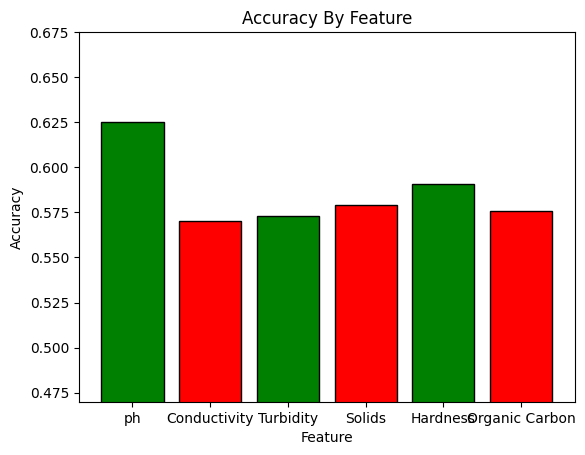

In [22]:
values = [0.625, 0.57, 0.573, 0.579, 0.591, 0.576]
features = ["ph", "Conductivity", "Turbidity", "Solids", "Hardness", "Organic Carbon"]

fig, ax = plt.subplots()

colors = ['g' if i % 2 == 1 else 'r' for i in nRange]
ax.bar(features, values, label=features, color = colors, edgecolor = 'k')

ax.set_ylabel('Accuracy')
ax.set_xlabel('Feature')
ax.set_title('Accuracy By Feature')

plt.ylim([max(min(values) - 0.1,0), min(max(values) + 0.05,1) ])

plt.show()

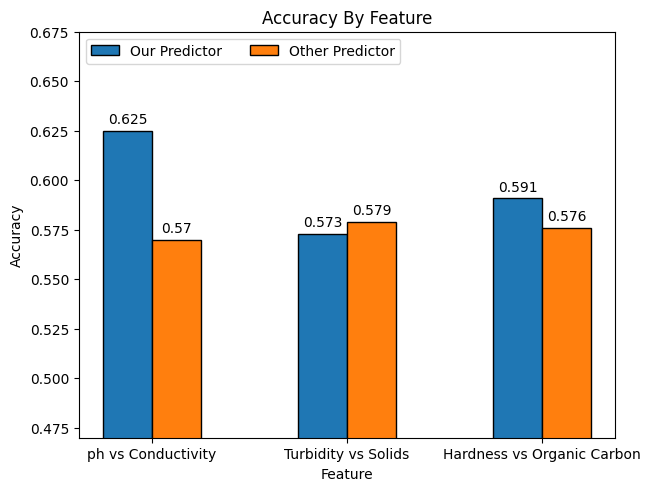

In [23]:
values = [0.625, 0.57, 0.573, 0.579, 0.591, 0.576]

labels = ("ph vs Conductivity", "Turbidity vs Solids", "Hardness vs Organic Carbon")
data = {
    'Our Predictor': (0.625, 0.573, 0.591), 
    'Other Predictor': (0.57, 0.579, 0.576)
}

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, edgecolor = 'k')
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Feature')
ax.set_title('Accuracy By Feature')
ax.set_xticks(x + width/2, labels)
ax.legend(loc='upper left', ncols=2)

plt.ylim([max(min(values) - 0.1,0), min(max(values) + 0.05,1) ])

plt.show()